###### Analysis of covid-19 effects on crime rates in Atlanta.

Finding covid-19 impacts on crimes and different types of crimes during 2020.

Comparing crime rates from 2016-2020.

How did covid-19 lockdown impact crime rate?

Were there any significant changes in different types of crimes due to covid19?


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
crimes_2016_2019_df = pd.read_csv('data/COBRA-2016-2019.csv')
crimes_2020_1_df = pd.read_csv('data/COBRA-2020-OldRMS-09292020.csv')
crimes_2020_2_df = pd.read_csv('data/COBRA-2020(NEW RMS 9-30 12-31).csv')
crimes_2021_df = pd.read_csv('data/COBRA-2021.csv')
covid19_2020_df = pd.read_csv('data/epicurve_rpt_date.csv')

/home/chsshong/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Concatenate two or more dataframes
def concat_df(df1,df2,df3=pd.DataFrame(),df4=pd.DataFrame()):
    df = pd.concat([df1, df2, df3, df4], axis=0)
    return df

In [4]:
crimes_df = concat_df(crimes_2016_2019_df, crimes_2020_1_df, crimes_2020_2_df,crimes_2021_df)

In [5]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146716 entries, 0 to 18779
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Report Number            146716 non-null  int64  
 1   Report Date              146716 non-null  object 
 2   Occur Date               146700 non-null  object 
 3   Occur Time               146700 non-null  object 
 4   Possible Date            146199 non-null  object 
 5   Possible Time            146198 non-null  object 
 6   Beat                     146672 non-null  object 
 7   Apartment Office Prefix  2664 non-null    object 
 8   Apartment Number         20807 non-null   object 
 9   Location                 146716 non-null  object 
 10  Shift Occurence          105856 non-null  object 
 11  Location Type            112525 non-null  object 
 12  UCR Literal              146716 non-null  object 
 13  UCR #                    146715 non-null  object 
 14  IBR C

In [6]:
lst_keep_column = ['Report Number', 'Occur Date', 'UCR Literal']

In [7]:
#Drop columns that won't be used
def drop_columns(df):
    df = df.drop(columns=[col for col in df if col not in lst_keep_column], axis=1)
    return df

In [8]:
crimes_df = drop_columns(crimes_df)

In [9]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146716 entries, 0 to 18779
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Report Number  146716 non-null  int64 
 1   Occur Date     146700 non-null  object
 2   UCR Literal    146716 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


In [10]:
#Drop null and nan values in column
def dropna_df(df,col):
    df = df.dropna(subset=[col],how='all')
    return df

In [11]:
crimes_df = dropna_df(crimes_df,'Occur Date')

In [12]:
crimes_df = dropna_df(crimes_df,'UCR Literal')

In [13]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146700 entries, 0 to 18769
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Report Number  146700 non-null  int64 
 1   Occur Date     146700 non-null  object
 2   UCR Literal    146700 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


In [14]:
#Show sorted list of unique values
def unique_vals(df, col):
    return sorted(df[col].unique())

In [15]:
unique_vals(crimes_df, 'UCR Literal')

['AGG ASSAULT',
 'AUTO THEFT',
 'BURGLARY',
 'BURGLARY-NONRES',
 'BURGLARY-RESIDENCE',
 'HOMICIDE',
 'LARCENY-FROM VEHICLE',
 'LARCENY-NON VEHICLE',
 'MANSLAUGHTER',
 'ROBBERY',
 'ROBBERY-COMMERCIAL',
 'ROBBERY-PEDESTRIAN',
 'ROBBERY-RESIDENCE']

In [16]:
#Convert date column to datetime
def date_time(df, col):
    df[col] = pd.to_datetime(df[col], errors='coerce')
    return df[col]

In [17]:
date_time(crimes_df, 'Occur Date')

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
18765   2021-11-17
18766   2021-11-18
18767   2021-11-18
18768   2021-11-18
18769   2021-11-18
Name: Occur Date, Length: 146700, dtype: datetime64[ns]

In [18]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146700 entries, 0 to 18769
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Report Number  146700 non-null  int64         
 1   Occur Date     146698 non-null  datetime64[ns]
 2   UCR Literal    146700 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ MB


In [19]:
#Create new column of "Year" from Date column
def col_year(df, col):
    df[col] = pd.DatetimeIndex(df['Occur Date']).year
    return df

In [20]:
col_year(crimes_df, 'Year')

,Report Number,Occur Date,UCR Literal,Year
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0
...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0


In [21]:
#Create new column of "Month" from Date column
def col_year(df, col):
    df[col] = pd.DatetimeIndex(df['Occur Date']).month
    return df

In [22]:
col_year(crimes_df, 'Month')

,Report Number,Occur Date,UCR Literal,Year,Month
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0


In [23]:
#Select "Occur Date" range starting at 2016-01-01
crimes_df = crimes_df[crimes_df['Occur Date'] >= '2016-01-01']

In [24]:
#Create new column of Month as String format mmm
def col_mmm(df, col):
    df[col] = df['Occur Date'].dt.strftime('%b')
    return df

In [25]:
col_mmm(crimes_df, 'MMM')

/tmp/ipykernel_14523/1714475895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df['Occur Date'].dt.strftime('%b')


,Report Number,Occur Date,UCR Literal,Year,Month,MMM
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov


In [26]:
def list_col(df, col):
    return sorted(df[col].unique())

In [27]:
list_col(crimes_df, 'UCR Literal')

['AGG ASSAULT',
 'AUTO THEFT',
 'BURGLARY',
 'BURGLARY-NONRES',
 'BURGLARY-RESIDENCE',
 'HOMICIDE',
 'LARCENY-FROM VEHICLE',
 'LARCENY-NON VEHICLE',
 'MANSLAUGHTER',
 'ROBBERY',
 'ROBBERY-COMMERCIAL',
 'ROBBERY-PEDESTRIAN',
 'ROBBERY-RESIDENCE']

#Creating New crime categories column

In [28]:
new_type_name = [
'LARCENY_FROM_VEHICLE',
'LARCENY_NON_VEHICLE',
'AUTO_THEFT',
'BURGLARY',
'AGG_ASSAULT',
'ROBBERY',
'HOMICIDE',
'MANSLAUGHTER']

HOMICIDE =  ['HOMICIDE']
AGG_ASSAULT = ['AGG ASSAULT']
MANSLAUGHTER = ['MANSLAUGHTER']
AUTO_THEFT = ['AUTO THEFT']
LARCENY_FROM_VEHICLE = ['LARCENY-FROM VEHICLE']
LARCENY_NON_VEHICLE = ['LARCENY-NON VEHICLE']
BURGLARY = ['BURGLARY-RESIDENCE', 'BURGLARY-NONRES', 'BURGLARY']
ROBBERY = ['ROBBERY', 'ROBBERY-PEDESTRIAN', 'ROBBERY-COMMERCIAL', 'ROBBERY-RESIDENCE']

new_type_cat = [
LARCENY_FROM_VEHICLE,
LARCENY_NON_VEHICLE,
AUTO_THEFT,
BURGLARY,
AGG_ASSAULT,
ROBBERY,
HOMICIDE,
MANSLAUGHTER]

In [29]:
def new_crime_cat(df):
# Here is the process of re-categorize the type of crime
    new_dic = {}
    for old_cat, str_name in zip(new_type_cat, new_type_name):
        for a, b in zip(old_cat, [str_name]*len(old_cat)):
            new_dic.update([(a, b)])
#Apply the dict to to df to create new categorial column and variable
    new_dic
    df['Crime Categories'] = None
    df['Crime Categories'] = df['UCR Literal'].map(new_dic)
    return df

In [30]:
new_crime_cat(crimes_df)

/tmp/ipykernel_14523/19276103.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime Categories'] = None
/tmp/ipykernel_14523/19276103.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime Categories'] = df['UCR Literal'].map(new_dic)


,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
...,...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov,LARCENY_NON_VEHICLE


In [31]:
crimes_df

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
...,...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov,LARCENY_NON_VEHICLE


In [32]:
#Select date range with date format as 'yyyy-mm-dd'
def range_df(df, start_date, end_date):
    mask = (df['Occur Date'] >= start_date) & (df['Occur Date'] < end_date)
    return df.loc[mask]

In [33]:
crimes_2016_2019_df = range_df(crimes_df, '2016-01-01', '2020-01-01')

In [34]:
crimes_2016_2019_df.tail()

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
8,211542057,2018-07-13,LARCENY-FROM VEHICLE,2018.0,7.0,Jul,LARCENY_FROM_VEHICLE
9,211608018,2018-07-31,LARCENY-NON VEHICLE,2018.0,7.0,Jul,LARCENY_NON_VEHICLE
10,211950729,2019-04-01,BURGLARY,2019.0,4.0,Apr,BURGLARY
11,210631781,2019-07-01,LARCENY-NON VEHICLE,2019.0,7.0,Jul,LARCENY_NON_VEHICLE
12,212261141,2019-08-14,LARCENY-NON VEHICLE,2019.0,8.0,Aug,LARCENY_NON_VEHICLE


In [35]:
crimes_2016_2020_df = range_df(crimes_df, '2016-01-01', '2021-01-01')

In [36]:
#Select "Year" range starting at year
crimes_2016_2019_df = crimes_df[crimes_df['Year'] < 2020]

In [37]:
#Select "Year" range starting at year
crimes_2019_df = crimes_df[crimes_df['Year'] == 2019]

In [38]:
#Select "Year" range starting at year
crimes_2020_df = crimes_df[crimes_df['Year'] == 2020]

In [39]:
crimes_2021_df = crimes_df[crimes_df['Year'] == 2021]

Total Number of Crime per Year

In [40]:
crimes_2016_2020_df= crimes_df[crimes_df['Occur Date'] < '2021-01-01']

In [41]:
#Bar Plot of Total Crimes Per "Year"
def plot_bar_total_crimes_year(df, col):
    fig, ax = plt.subplots(figsize=[7,6])
    ax = sns.barplot(x=df[col].value_counts().index.tolist(), y=df[col].value_counts().values)
    plt.title('Total Crimes in Atlanta Per Year (2016-2020)', fontsize = 20)
    plt.ylabel('Number of Crimes', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.bar_label(ax.containers[0],size=13)
    fig.tight_layout()
    #plt.savefig('images/Total Crimes in Atlanta Per Year (2016-2020)', dpi=100)

In [44]:
def plot_count_crimes_cat_year(df):
    fig, ax = plt.subplots(figsize=[8.5, 6])
    ax = sns.countplot(y = df['Crime Categories'], data = df, order = df['Crime Categories'].value_counts().index)
    ax.title((input('Fig Title: '), fontsize = 20)
    ax.xlabel('Number of Crimes', fontsize = 15)
    ax.ylabel('Crime Categories', fontsize = 15)
    ax.xticks(fontsize = 9)
    ax.yticks(fontsize = 9)
    ax.bar_label(ax.containers[0],size=8)
    fig.tight_layout()

SyntaxError: invalid syntax (1438899202.py, line 4)

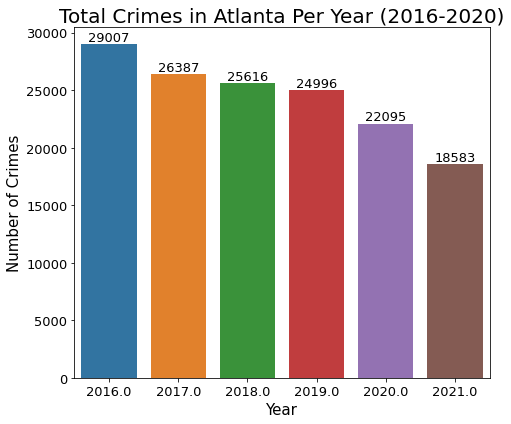

In [43]:
plot_bar_total_crimes_year(crimes_df, "Year")

In [43]:
#Bar Plot of Crime categories
def plot_bar_crimes_cat_year(df):
    fig, ax = plt.subplots(figsize=[8.5, 6])
    ax = sns.countplot(y = df['Crime Categories'], data = df, order = df['Crime Categories'].value_counts().index)
    plt.title('Crimes in Atlanta (2020)', fontsize = 20)
    plt.xlabel('Number of Crimes', fontsize = 15)
    plt.ylabel('Crime Categories', fontsize = 15)
    plt.xticks(fontsize = 9)
    plt.yticks(fontsize = 9)
    plt.bar_label(ax.containers[0],size=8)
    #plt.savefig('images/Crimes in Atlanta (2020)', dpi=100, bbox_inches = "tight")

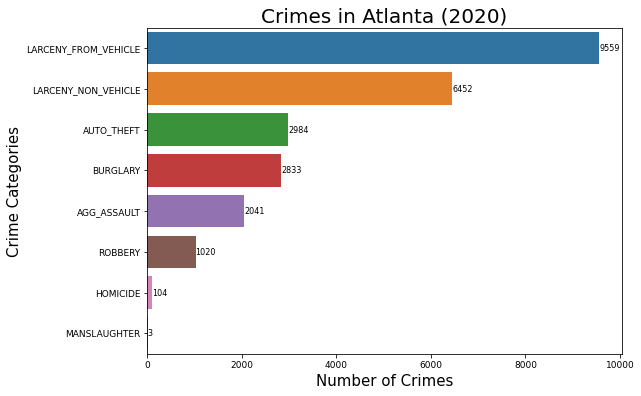

In [44]:
plot_bar_crimes_cat_year(crimes_2019_df)

In [45]:
#Count Plot of Total Crimes in each Month
def plot_count_total_crimes_monthly(df):
    fig, ax = plt.subplots(figsize=[8, 6])
    ax = sns.countplot(x=df['MMM'])
    plt.title(input('Input Chart Title: '), fontsize = 20)
    plt.ylabel('Number of Crimes', fontsize = 15)
    plt.xlabel('Month', fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.bar_label(ax.containers[0],size=13)
    fig.tight_layout()
    #plt.savefig('images/Crimes in each Month', dpi=100)

Input Chart Title: 


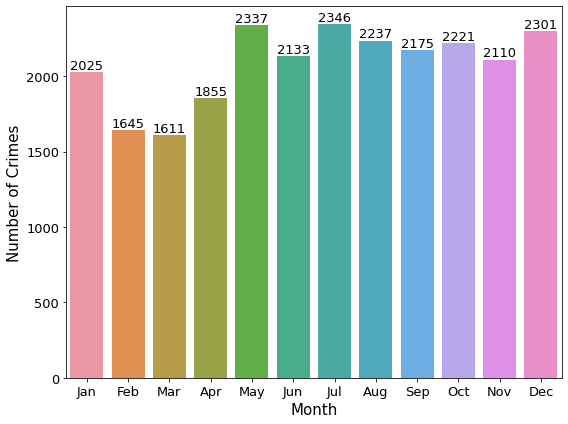

In [46]:
plot_count_total_crimes_monthly(crimes_2019_df)

In [47]:
crimes_df.groupby(['Occur Date'])['UCR Literal'].count().reset_index(name="Total Daily Report")

,Occur Date,Total Daily Report
0,2016-01-01,81
1,2016-01-02,82
2,2016-01-03,69
3,2016-01-04,71
4,2016-01-05,72
...,...,...
2144,2021-11-14,54
2145,2021-11-15,56
2146,2021-11-16,49
2147,2021-11-17,47


In [48]:
crimes_df

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
...,...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov,LARCENY_NON_VEHICLE


In [49]:
def total_crime_daily(df,date_col,cat_col,new_col):
    df = df.groupby([date_col])[cat_col].count().reset_index(name=new_col)
    return df

In [50]:
new_df = total_crime_daily(crimes_df,"Occur Date", "Crime Categories", "Total")

In [51]:
new_df.head()

,Occur Date,Total
0,2016-01-01,81
1,2016-01-02,82
2,2016-01-03,69
3,2016-01-04,71
4,2016-01-05,72


In [52]:
total_daily_report_df = crimes_2020_df.groupby('Occur Date')["Report Number"].count().reset_index(name="Total Daily Report")

In [53]:
total_daily_report_df.head()

,Occur Date,Total Daily Report
0,2020-01-01,74
1,2020-01-02,49
2,2020-01-03,83
3,2020-01-04,75
4,2020-01-05,57


In [54]:
#Get rolling mean
def rolling_avg(df,col1,col2,num):
    df[col1] = df[col2].rolling(num).mean()
    return df

In [55]:
rolling_avg(new_df,"30 Day Avg", "Total", 30)

,Occur Date,Total,30 Day Avg
0,2016-01-01,81,NaN
1,2016-01-02,82,NaN
2,2016-01-03,69,NaN
3,2016-01-04,71,NaN
4,2016-01-05,72,NaN
...,...,...,...
2144,2021-11-14,54,64.166667
2145,2021-11-15,56,63.600000
2146,2021-11-16,49,63.366667
2147,2021-11-17,47,62.366667


In [56]:
new_df.head()

,Occur Date,Total,30 Day Avg
0,2016-01-01,81,NaN
1,2016-01-02,82,NaN
2,2016-01-03,69,NaN
3,2016-01-04,71,NaN
4,2016-01-05,72,NaN


In [57]:
new_df['7 Day Avg'] = new_df['Total'].rolling(7).mean()

In [58]:
new_df.head()

,Occur Date,Total,30 Day Avg,7 Day Avg
0,2016-01-01,81,NaN,NaN
1,2016-01-02,82,NaN,NaN
2,2016-01-03,69,NaN,NaN
3,2016-01-04,71,NaN,NaN
4,2016-01-05,72,NaN,NaN


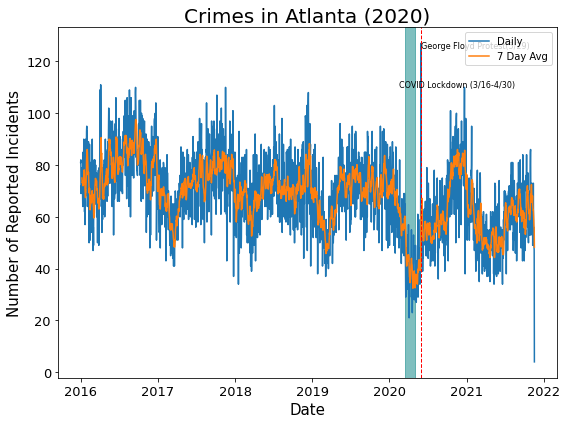

In [59]:
#Line Plot of Crimes in Atlanta (2020)
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x= new_df['Occur Date'], y= new_df['Total'], label="Daily")
sns.lineplot(x= new_df['Occur Date'], y= new_df['7 Day Avg'], label="7 Day Avg")
ax.set_ylabel('Number of Reported Incidents', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_title('Crimes in Atlanta (2020)', fontsize = 20)
ax.axvline([dt.datetime(2020,5,29)], linestyle='--', color='red', lw=1)
plt.text([dt.datetime(2020,2,15)], 110, 'COVID Lockdown (3/16-4/30)', fontsize= 8)
plt.text([dt.datetime(2020,6,1)], 125, 'George Floyd Protest(5/29)', fontsize= 8)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axvspan(dt.datetime(2020,3,15), dt.datetime(2020,4,30), color='teal', alpha=0.5,
               label='2008 Crisis')
fig.tight_layout()
#plt.savefig('images/Crimes in Atlanta (2020)', dpi=100)

In [60]:
total_crime_report_df = crimes_df.groupby('Occur Date')["Report Number"].count().reset_index(name="Total Daily Report")

In [61]:
total_crime_report_df.head()

,Occur Date,Total Daily Report
0,2016-01-01,81
1,2016-01-02,82
2,2016-01-03,69
3,2016-01-04,71
4,2016-01-05,72


In [62]:
total_crime_report_df['30 Day Avg'] = total_crime_report_df['Total Daily Report'].rolling(30).mean()

In [63]:
total_crime_report_df.head(15)

,Occur Date,Total Daily Report,30 Day Avg
0,2016-01-01,81,NaN
1,2016-01-02,82,NaN
2,2016-01-03,69,NaN
3,2016-01-04,71,NaN
4,2016-01-05,72,NaN
5,2016-01-06,71,NaN
6,2016-01-07,79,NaN
7,2016-01-08,74,NaN
8,2016-01-09,76,NaN
9,2016-01-10,71,NaN


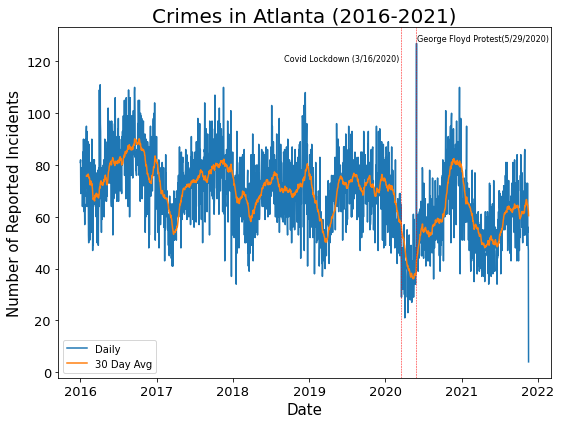

In [64]:
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x = new_df['Occur Date'], y = new_df['Total'], label="Daily")
sns.lineplot(x = new_df['Occur Date'], y = new_df['30 Day Avg'], label="30 Day Avg")
ax.set_ylabel('Number of Reported Incidents', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_title('Crimes in Atlanta (2016-2021)', fontsize = 20)
ax.axvline([dt.datetime(2020,3,16)], linestyle='--', color='red', lw=.5)
ax.axvline([dt.datetime(2020,5,29)], linestyle='--', color='red', lw=.5)
plt.text([dt.datetime(2018,9,1)], 120, 'Covid Lockdown (3/16/2020)', fontsize= 8)
plt.text([dt.datetime(2020,6,1)], 128, 'George Floyd Protest(5/29/2020)', fontsize= 8)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='lower left')
fig.tight_layout()
#plt.savefig('images/Crimes in Atlanta (2016-2021)', dpi=100)

In [ ]:
crimes_stats_df = crimes_stats_df.sort_index(axis=0)

In [ ]:
crimes_stats_df.drop(crimes_stats_df.iloc[:, 1:], inplace = True, axis = 1)

In [ ]:
crimes_stats_df.rename(columns={'Report Number': '4-year avg'}, inplace=True)

In [ ]:
crimes_stats_df.head(15)

In [ ]:
crimes_stats_2020_df = crimes_2020_df.groupby(['Crime Categories']).count()

In [ ]:
crimes_stats_2020_df =crimes_stats_2020_df.sort_index(axis=0)

In [ ]:
crimes_stats_2020_df.drop(crimes_stats_2020_df.iloc[:, 1:], inplace = True, axis = 1)

In [ ]:
crimes_stats_2020_df.rename(columns={'Report Number': '2020'}, inplace=True)

In [ ]:
crimes_stats_2020_df.head(15)

In [ ]:
crimes_stats_all_df= pd.concat([crimes_stats_df, crimes_stats_2020_df.reindex(crimes_stats_df.index)], axis=1)

In [ ]:
crimes_stats_all_df.head(15)

In [ ]:
crimes_stats_all_df['4-year avg'] = crimes_stats_all_df['4-year avg'] /4

In [ ]:
crimes_stats_all_df['diff'] = crimes_stats_all_df['2020'] - crimes_stats_all_df['4-year avg']

In [ ]:
crimes_stats_all_df.head(15)

In [ ]:
crimes_stats_all_df.loc['TOTAL']= crimes_stats_all_df.sum(numeric_only=True, axis=0)

In [ ]:
crimes_stats_all_df['%_diff'] = crimes_stats_all_df['diff'] / crimes_stats_all_df['4-year avg'] *100

In [ ]:
crimes_stats_all_df.head(10)

In [ ]:
covid19_2020_df.head()

In [ ]:
def filt_column(df, col, value):
    df = df[df[col] == value]
    return df

In [ ]:
filt_column(covid19_2020_df, "county", "Fulton")

In [ ]:
fulton_df.head()

In [ ]:
new_covid19_2020_df = covid19_2020_df[covid19_2020_df["county"] == "Fulton"]

In [ ]:
date_time(new_covid19_2020_df, 'report_date').head()

In [ ]:
new_covid19_2020_df = new_covid19_2020_df[new_covid19_2020_df['report_date'] < '2021-01-01']

In [ ]:
#Count Plot of Total Crimes in each Month
def plot_line_graph(df,colx,coly):
    fig, ax = plt.subplots(figsize = (8,6))
    ax = sns.lineplot(x = df[colx], y = df[coly])
    ax.set_ylabel('Daily Reported Cases', fontsize = 15)
    ax.set_xlabel('Month (2020)', fontsize = 15)
    ax.set_title(input('Fig Title: '), fontsize = 20)
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 13)
    plt.grid()
    fig.tight_layout()
    plt.savefig(f{'images/input()'}, dpi=100)

In [ ]:
plot_line_graph(new_covid19_2020_df, "report_date", "cases")

In [ ]:
new_covid19_2020_df['Month'] = new_covid19_2020_df['report_date'].dt.strftime('%b')

In [ ]:
def col_mmm(df, col1, col2):
    df[col1] = df[col2].dt.strftime('%b')
    return df

In [ ]:
col_mmm(new_covid19_2020_df, "Month", "report_date")

In [ ]:
#Bar Plot of Covid Cases in each Month (2020)
fig, ax = plt.subplots(figsize=[8, 6])
ax = sns.barplot(x=new_covid19_2020_df['Month'], y = new_covid19_2020_df['cases'])
ax.set_ylabel('Monthly Reported Cases', fontsize = 15)
ax.set_xlabel('Month (2020)', fontsize = 15)
ax.set_title('Fulton County, GA Monthly Covid-19 Cases (2020)', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
fig.tight_layout()
#plt.savefig('images/Fulton County, GA Monthly Covid-19 Cases (2020)', dpi=100)

In [ ]:
type_crimes_2020_df = crimes_2020_df.groupby(["Month", "Crime Categories"]).head()

In [ ]:
type_crimes_2020_df.tail(10)

In [ ]:
def unique_vals(df, col):
    return sorted(df[col].unique())

In [ ]:
cat_crime = unique_vals(type_crimes_2020_df, "Crime Categories")

In [ ]:
cat_crime

In [85]:
crimes_2020_df

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories,count
140,200010590,2020-01-01,ROBBERY,2020.0,1.0,Jan,ROBBERY,NaN
141,200011603,2020-01-01,ROBBERY,2020.0,1.0,Jan,ROBBERY,NaN
142,200011773,2020-01-01,ROBBERY,2020.0,1.0,Jan,ROBBERY,NaN
143,200010724,2020-01-01,AGG ASSAULT,2020.0,1.0,Jan,AGG_ASSAULT,NaN
144,200010628,2020-01-01,AGG ASSAULT,2020.0,1.0,Jan,AGG_ASSAULT,NaN
...,...,...,...,...,...,...,...,...
182,210040328,2020-12-31,LARCENY-NON VEHICLE,2020.0,12.0,Dec,LARCENY_NON_VEHICLE,NaN
183,210040706,2020-12-31,AUTO THEFT,2020.0,12.0,Dec,AUTO_THEFT,NaN
184,210080540,2020-12-31,LARCENY-NON VEHICLE,2020.0,12.0,Dec,LARCENY_NON_VEHICLE,NaN
185,210110879,2020-12-31,LARCENY-FROM VEHICLE,2020.0,12.0,Dec,LARCENY_FROM_VEHICLE,NaN


In [88]:
type_crimes_df = crimes_2020_df.groupby(["Month","Crime Categories"])["Report Number"].count().reset_index(name="count")

In [89]:
type_crimes_df.head(20)


,Month,Crime Categories,count
0,1.0,AGG_ASSAULT,129
1,1.0,AUTO_THEFT,273
2,1.0,BURGLARY,202
3,1.0,HOMICIDE,5
4,1.0,LARCENY_FROM_VEHICLE,947
5,1.0,LARCENY_NON_VEHICLE,569
6,1.0,ROBBERY,72
7,2.0,AGG_ASSAULT,122
8,2.0,AUTO_THEFT,228
9,2.0,BURGLARY,150


In [90]:
type_crimes = ['ROBBERY',
 'AGG_ASSAULT',
 'BURGLARY',
 'LARCENY_NON_VEHICLE',
 'LARCENY_FROM_VEHICLE',
 'AUTO_THEFT',
 'HOMICIDE']

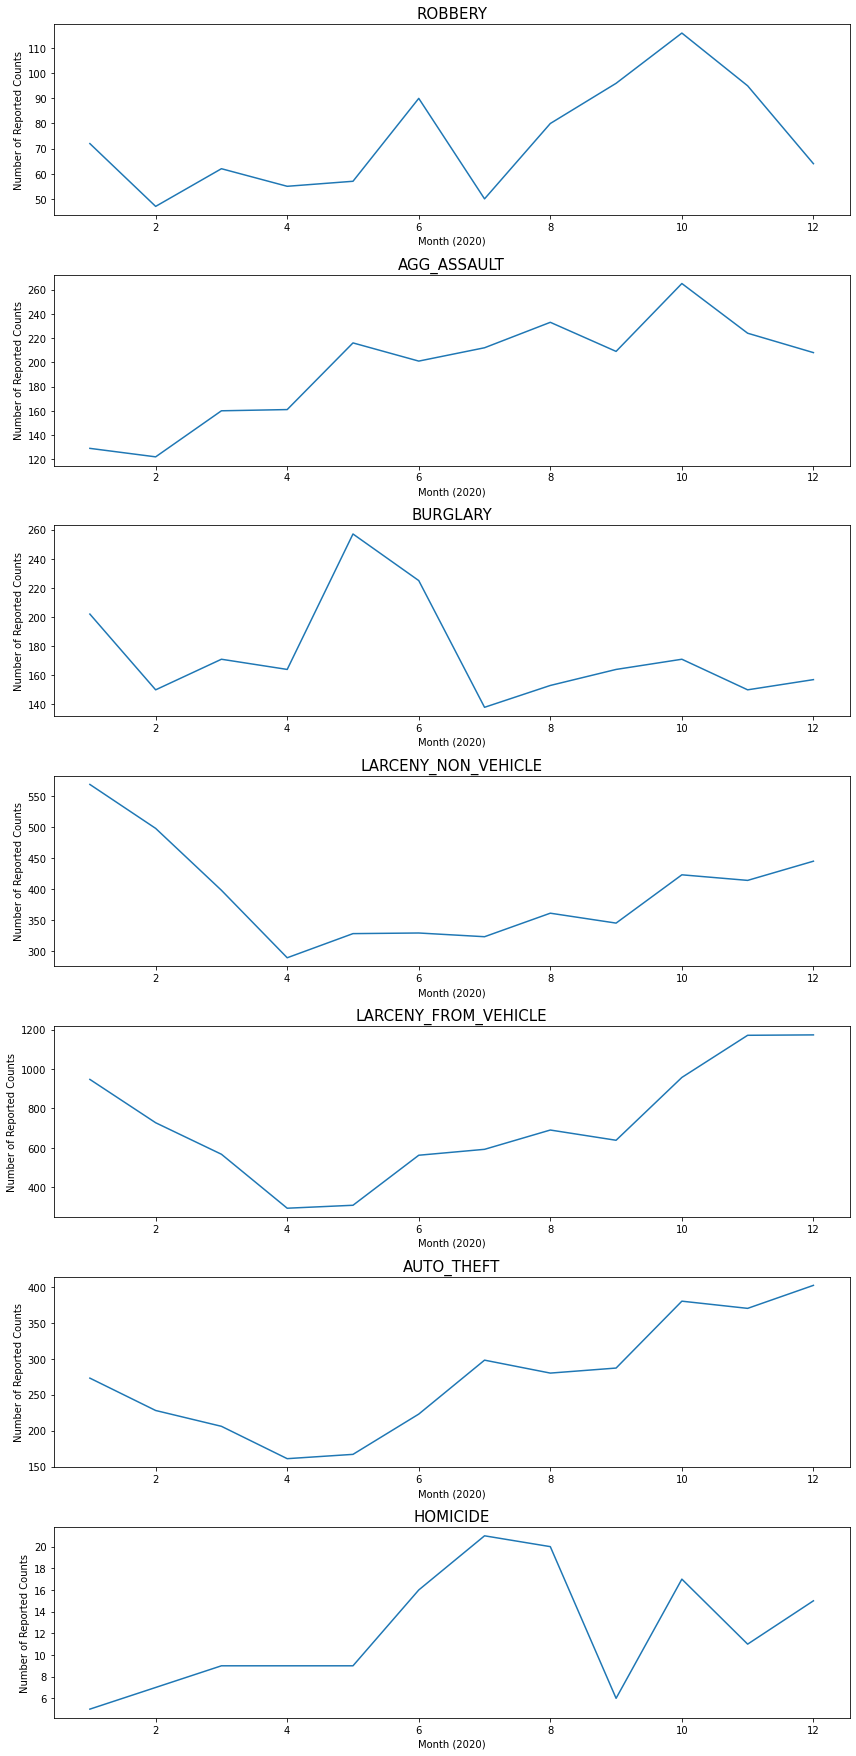

In [98]:
fig, ax = plt.subplots(nrows=len(type_crimes), figsize=(12,len(type_crimes)*3.5))
for i in type_crimes:
    ind = type_crimes.index(i)
    filt = type_crimes_df['Crime Categories'] == i #filter the dataframe for each type in the list
    ax[ind].set_title(i, size=15)
    ax[ind].plot(type_crimes_df.loc[filt]['Month'],type_crimes_df.loc[filt]['count'])
    ax[ind].set_ylabel('Number of Reported Counts', fontsize = 10)
    ax[ind].set_xlabel('Month (2020)', fontsize = 10)
    plt.tight_layout()
    plt.savefig('images/Crime Categories subplots updated (2020)', dpi=100)
